# MTH 337: Week 11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Recursion

This is a technique to solve a large problem by breaking it into smaller problems of the same type.

It is used here to find the points which map to zero under Newton's Method for Report 4.

In [2]:
def plot_z_back(w, depth):
    plt.plot(w.real, w.imag, 'm.', ms=1)
    if depth > 0:
        for z in np.roots([2, -3*w, 0, 1.]):
            plot_z_back(z, depth-1)

(-1, 1)

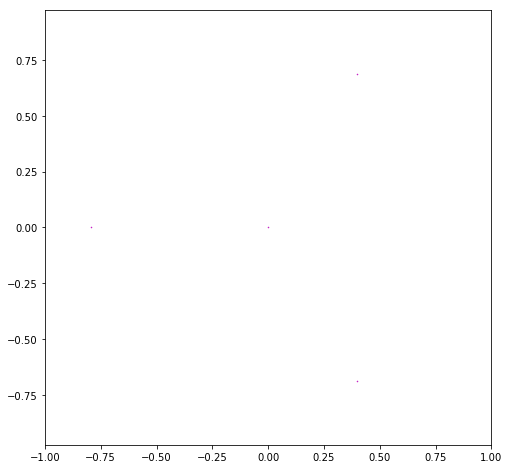

In [3]:
plt.figure(figsize=(8,8))
plt.axis('equal')
plot_z_back(0, 1)
plt.xlim(-1,1)
plt.ylim(-1,1)

The points which are mapped to zero constitute the boundaries of the basins of attraction.

(-1, 1)

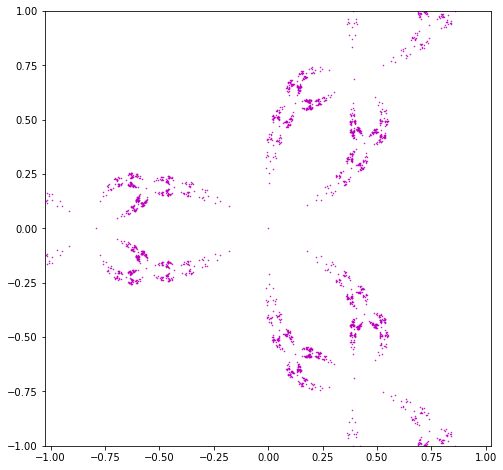

In [4]:
plt.figure(figsize=(8,8))
plt.axis('equal')
plot_z_back(0, 7)
plt.xlim(-1,1)
plt.ylim(-1,1)

## Random Number Generation

In [5]:
def testf(x):
    return 2 + 2*np.sin(50*x)

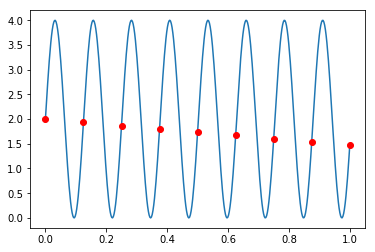

In [6]:
x = np.linspace(0, 1, 400)
sample = np.linspace(0, 1, 9)
plt.plot(x, testf(x))
plt.plot(sample, testf(sample), 'ro');

The sample is correlated with the function, leading to a large error in the estimated mean.

In [7]:
print(np.mean(testf(x)))
print(np.mean(testf(sample)))

2.00074008859
1.7362671434


### Plotting g(x) = ax mod 1

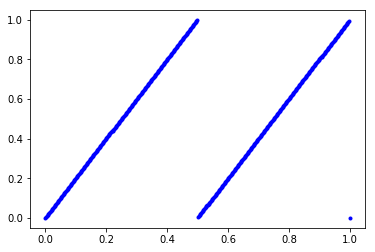

In [8]:
a = 2
x = np.linspace(0, 1, 400)
plt.plot(x, a*x % 1, 'b.');

#### With large a, the function "fills" the square.

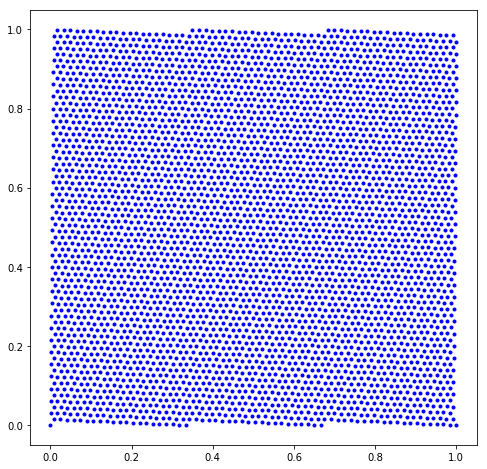

In [9]:
a = 123
x = np.linspace(0, 1, 4000)
plt.figure(figsize=(8,8))
plt.plot(x, a*x % 1, 'b.');

## Linear Congruential Generators

In [10]:
def rng(x, npts):
    a = 427419669081
    m = 999999999989
    u = np.empty(npts)
    u[0] = x/m
    for i in range(1, npts):
        x = (a*x) % m
        u[i] = x/m
    return u

In [11]:
rng(100, 10)

array([  1.00000000e-10,   7.41966909e-01,   1.11069327e-01,
         3.63307370e-01,   4.25614357e-01,   8.45871898e-01,
         6.75383055e-01,   2.06222209e-01,   2.97412178e-01,
         4.30561393e-01])

### Matplotlib "hist" plots histograms

- The first argument is an array of values to bin
- The keyword argument "bins" is an integer specifying the number of bins to use.
- The keyword argument "normed" is a boolean. If True, the height of the bins is scaled so that the area of the histogram equals 1 (as with a probability distribution).

[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.   ]


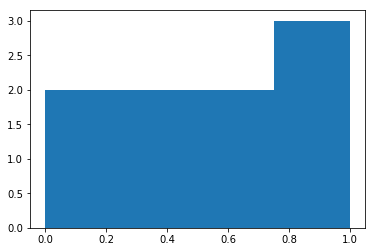

In [12]:
x = np.linspace(0, 1, 9)
print(x)
plt.hist(x, bins=4);

[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.   ]


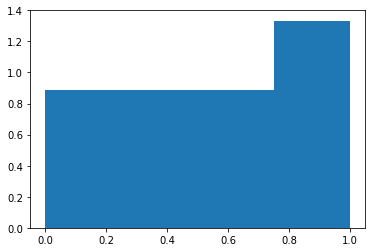

In [13]:
x = np.linspace(0, 1, 9)
print(x)
plt.hist(x, bins=4, normed=True);

## numpy.random.rand

This is the random number generator provided with NumPy.

- Generates sample drawn from a uniform distribution on [0, 1)
- Parameters are integers d0, d1, ..., dn
- Returns an array of shape (d0, d1, ..., dn)

In [14]:
from numpy.random import rand

In [15]:
rand(10)

array([ 0.52549643,  0.95819301,  0.54512186,  0.18129728,  0.92988033,
        0.0884429 ,  0.11767395,  0.61890788,  0.79394993,  0.16992025])

In [16]:
rand(100)

array([ 0.14902262,  0.52254684,  0.53914302,  0.25231421,  0.60328819,
        0.16522801,  0.13725193,  0.18322843,  0.36646953,  0.98731111,
        0.78991019,  0.18173118,  0.52625503,  0.81654211,  0.82977987,
        0.37061361,  0.2441615 ,  0.00936516,  0.54183976,  0.39836081,
        0.32173489,  0.94338086,  0.15538381,  0.00185778,  0.11397879,
        0.16550067,  0.82379392,  0.21999458,  0.62387449,  0.16544762,
        0.71682955,  0.74915452,  0.43156278,  0.51474478,  0.45610063,
        0.63363048,  0.71355939,  0.6924147 ,  0.92288254,  0.87309555,
        0.62543631,  0.14590222,  0.4342737 ,  0.88135118,  0.07200608,
        0.19725349,  0.90024599,  0.57960725,  0.66607053,  0.29672652,
        0.44603194,  0.95288907,  0.11485101,  0.89528246,  0.70701637,
        0.96678284,  0.28179191,  0.40207585,  0.37690367,  0.08424522,
        0.57490385,  0.57144534,  0.69156579,  0.09061287,  0.98068288,
        0.03540126,  0.57917151,  0.1780955 ,  0.02374806,  0.93

In [17]:
rand(2,3)

array([[ 0.26090459,  0.44504875,  0.7702482 ],
       [ 0.47518546,  0.88808476,  0.95595637]])

## Exercise 2: Monte Carlo Integration

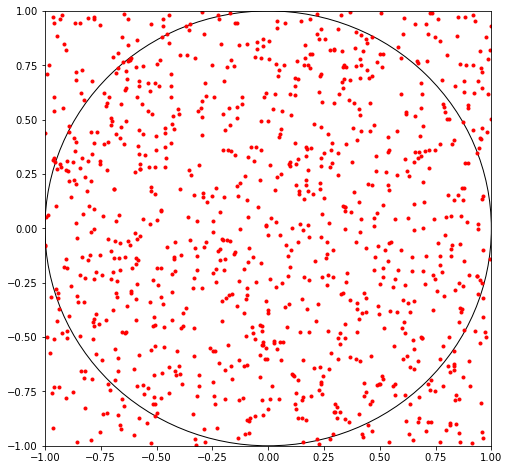

In [18]:
npts = 1000
x, y = rand(2, npts)*2 - 1
radius = 1
plt.figure(figsize=(8,8))
plt.plot(x, y, 'r.')
circle = plt.Circle((0, 0), radius, fill=False)
plt.gca().add_artist(circle)
plt.xlim(-1,1)
plt.ylim(-1,1);

## Axis-Dependent Operations

Summing an entire array.

In [19]:
a = np.arange(12).reshape((3, 4))
print(a)
print(np.sum(a))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
66


Summing down the columns of an array.

In [20]:
sum_cols = np.sum(a, axis=0)
print(a.shape)
print(sum_cols)
print(sum_cols.shape)

(3, 4)
[12 15 18 21]
(4,)


Summing across the rows of an array.

In [21]:
sum_rows = np.sum(a, axis=1)
print(a.shape)
print(sum_rows)
print(sum_rows.shape)

(3, 4)
[ 6 22 38]
(3,)


## Exercise 3: Bernoulli Random Variables

- Each point is a Bernouli random variable with p = 0.6.
- Each game is represented by a boolean array with seven elements.
- The winner is the player with four or more points.

In [22]:
points = rand(7) < 0.6
print(points)
print(np.sum(points))

[ True False  True False False  True  True]
4


In [23]:
ngames = 10
points = rand(7, ngames) < 0.6
scores = np.sum(points, axis=0)
print(scores)
wins = scores >= 4
print(wins)
print(np.mean(wins))

[3 3 5 3 4 4 4 2 5 5]
[False False  True False  True  True  True False  True  True]
0.6
